# Bond valuation tutorial

This is a tutorial describing the functions in the `functions.py` module. These functions are tailored to understanding the valuation of currently listed, investment grade Australian Government Treasury Bonds (eTBs).

**Note.** *The payment periods for all eTBs are half-yearly. All figures are expressed, where relevant, in annulaused form.*

## Bond list

The function `etbList_AU()` in module `functions.py` returns a pandas dataframe comprising the current list of exchange traded Australian Government Treasury Bonds (eTBs). These are obtained from the government website [here](https://www.australiangovernmentbonds.gov.au/bond-types/exchange-traded-treasury-bonds/list-etbs).

In [1]:
from functions import etbList_AU

etblist = etbList_AU()
etblist = etblist.reset_index(drop=True)

etblist

At the time of writing there are `28` eTBs currently issued by the Australian Government.

## Bond Value

The function `etbListWithValueYield_AU()` returns the same dataframe with the following columns added:

- `bond_value`;
- `bond_value_yields`;
- `bond_yields`;
- `netReturnOn_AUD1000`

Each entry depends on the bond's current market price. The bond's value and value yields and net return on `AUD1000` assume the bond holder buys the bond at the current market price and holds it to maturity.

This function passes no arguments and uses Python's web scraper package `BeautifulSoup` to retrieve the bond's current market price from Yahoo Finance. If values in any entry is is `nan`, it means Yahoo Finance did not have a record of this bond.

In [3]:
from functions import etbListWithValueYield_AU

etblist_value_yield = etbListWithValueYield_AU()

etblist_value_yield = etblist_value_yield.reset_index(drop=True)
etblist_value_yield

**Note.** *If a value in the `bond_value` column is negative, it means the corresponding bond is overpriced in the market. One expects to *lose* money if one buys at the current market price and holdis it to maturity. This can also be seen in the column `netReturnOn_AUD1000`.*

**Note.** *The bond value yield is a means of comparing bonds with differing maturities. It is used in calculating stock RROI.*

At time of writing the value of the longest maturity bond on the list, `GSBK51` is `62.46`. This means if we buy `100` units of `GSBK51`at the current market price, we will earn `62.46 * 100 = 6246` at maturity, being `21-Jun-2051`. Alternatively, if we invest `AUD1000`, this allows us to buy `AUD1000 // current_market_price` many units. At time of writing, we see that *net* return will be `999.360`. So, by `21-Jun-2051`, the value of our investment in `GSBK51` will have (almost) doubled.

Lastly, while the coupon on this bond is `1.75%` per year, it is trading at below face value. Its *yield* is therefore higher. We see it is `2.82%`. 

## Bond list with Run Rate

A crucial component in the valuations above is the assumption the bond holder *holds to maturity*. Bonds which are closer to maturity ought to have lower value since their market price will tend to converge to face value at maturity. A better means of comparing bonds with differing maturities is then to simply correct for maturity, yielding a bond's "run-rate". That is, dividing their value by their time to maturity. A bond's run rate is equivalently its net value *per unit time*, which we have annualised to *net value per year*. 

**Note.** *While the value yield in the `bond_value_yield` column is another means of comparing bonds, we propose it is not as intuitive a measure as the run rate.

The function `etbListWithValueYieldRunRate()` in `functions.py` returns the same data as `etbListWithValueYield_AU()` with an extra column recording the bond's run rate. It does not pass any arguments.


In [5]:
from functions import etbListWithValueYieldRunRate_AU

etblistvalue_yield_runrate = etbListWithValueYieldRunRate_AU()

etblistvalue_yield_runrate = etblistvalue_yield_runrate.reset_index(drop=True)
etblistvalue_yield_runrate[['ASX_code', 'runRate_annualised']] # displaying only the bond code and run rate

Since the above is a pandas dataframe we can call the method `sort_values()` to reorder by `run_rate`. The highest value-per-unit-time bond is at the top; while the lowest is at the bottom. 

In [7]:
etblistvalue_yield_runrate.sort_values('runRate_annualised', ascending=False).reset_index(drop=True)

,maturity,coupon,ASX_code,payDates,bond_value,bond_value_yield,bond_yields,netReturnOn_AUD1000,runRate_annualised
0,21-Sep-2026,0.50%,GSBQ26,"21-Sep, 21-Mar",9.820,10.8%,0.55%,98.200,6.546667
1,21-Nov-2024,0.25%,GSBU24,"21-May, 21-Nov",5.650,5.97%,0.26%,56.500,5.650000
2,21-Nov-2025,0.25%,GSBU25,"21-May, 21-Nov",8.375,9.1%,0.27%,83.750,5.583333
3,21-Dec-2030,1.00%,GSBW30,"21-Dec, 21-Jun",22.250,27.22%,1.22%,267.000,5.562500
4,21-May-2032,1.25%,GSBI32,"21-May, 21-Nov",24.385,30.02%,1.54%,292.620,5.418889
5,21-Jun-2031,1.50%,GSBK31,"21-Jun, 21-Dec",19.610,22.7%,1.74%,215.710,4.902500
6,21-Nov-2032,1.75%,GSBU32,"21-May, 21-Nov",24.330,28.82%,2.07%,267.630,4.866000
7,21-May-2030,2.50%,GSBI30,"21-May, 21-Nov",16.830,18.31%,2.72%,168.300,4.808571
8,21-May-2041,2.75%,GSBI41,"21-May, 21-Nov",41.840,50.46%,3.32%,502.080,4.648889
9,21-Jun-2035,2.75%,GSBK35,"21-Jun, 21-Dec",26.830,29.92%,3.07%,295.130,4.471667


At time of writing it is interesting to note, while the coupon and yield of bonds `GSBU24` and `GSBQ26` are quite low compared to others, they nevertheless have high run rates. This is due to these bonds currently trading at market price *below* face value in addition to having a relatively soons maturities. 

And so, while its yields are low, the above result suggests `GSBU24` and `GSBQ26` are good buys when its market price, face value and maturity are considered.

## Yield curve

In the module `yield_sketch.py` the function `sketch_yields()` uses the Python plotting package `matplotlib` to display the yield curve graph. It is a sketch of bond yields against bonds. Superimposed on the graph is the regression line, which is sketched using the Python package `scipy`. The yield curve is said to be *inverted* if the slope of the regression line is negative, meaning yields of longer term maturity bonds are, on average, lower than the shorter term maturities. 

Inverted yields are indicative of upcoming recessions, apparently.

The function `sketch_yields()` does not pass any arguments.

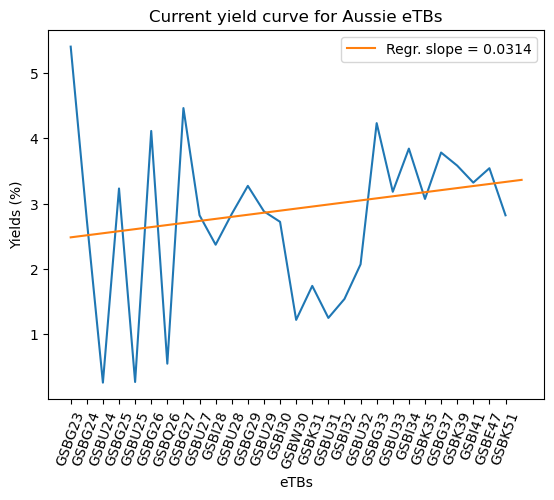

In [1]:
from yield_sketch import sketch_yields

sketch_yields()

At time of writing, the current yield curve regression slope is `0.0314`. This is positive, meaning the yield curve is *not* inverted.